# **Challenge Telecom X -Parte 2** -

## **Predicciendo la Evación de Clientes**

## **0. Imports y configuaración**

In [1]:
#Core
import numpy as np
import pandas as pd

#Plot

import matplotlib.pyplot as plt
import seaborn as sns

## **1. Cargar Datos**

In [4]:
# Ver y ajustar ruta de carga
df = pd.read_csv('df_model_churn.csv')


In [5]:
print(df.shape)
df.head(5)

(7267, 25)


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,check_total,diff_total,account_Charges_day,churn_bin
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,One year,Yes,Mailed Check,65.6,593.30,590.4,2.90,2.186667,0.0
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,Yes,Month-to-month,No,Mailed Check,59.9,542.40,539.1,3.30,1.996667,0.0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Month-to-month,Yes,Electronic Check,73.9,280.85,295.6,-14.75,2.463333,1.0
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Month-to-month,Yes,Electronic Check,98.0,1237.85,1274.0,-36.15,3.266667,1.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Month-to-month,Yes,Mailed Check,83.9,267.40,251.7,15.70,2.796667,1.0


## **2. Revisión rápida**

In [6]:
print (df["Churn"].value_counts(dropna=False))
print ((df["Churn"].value_counts(normalize=True)*100).round(1))

# Información general
df.info()

Churn
No     5174
Yes    1869
NaN     224
Name: count, dtype: int64
Churn
No     73.5
Yes    26.5
Name: proportion, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      72

In [7]:
# Conteo de valores únicos por columna
print(df.nunique())

customerID                   7267
Churn                           2
customer_gender                 2
customer_SeniorCitizen          2
customer_Partner                2
customer_Dependents             2
customer_tenure                73
phone_PhoneService              2
phone_MultipleLines             3
internet_InternetService        3
internet_OnlineSecurity         3
internet_OnlineBackup           3
internet_DeviceProtection       3
internet_TechSupport            3
internet_StreamingTV            3
internet_StreamingMovies        3
account_Contract                3
account_PaperlessBilling        2
account_PaymentMethod           4
account_Charges_Monthly      1585
account_Charges_Total        6530
check_total                  6018
diff_total                   5310
account_Charges_day          1585
churn_bin                       2
dtype: int64


In [8]:
# Conteo de valores nulos por columna
print(df.isnull().sum())

customerID                     0
Churn                        224
customer_gender                0
customer_SeniorCitizen         0
customer_Partner               0
customer_Dependents            0
customer_tenure                0
phone_PhoneService             0
phone_MultipleLines            0
internet_InternetService       0
internet_OnlineSecurity        0
internet_OnlineBackup          0
internet_DeviceProtection      0
internet_TechSupport           0
internet_StreamingTV           0
internet_StreamingMovies       0
account_Contract               0
account_PaperlessBilling       0
account_PaymentMethod          0
account_Charges_Monthly        0
account_Charges_Total         11
check_total                    0
diff_total                    11
account_Charges_day            0
churn_bin                    224
dtype: int64


In [9]:
# Revisar columnas con un solo valor repetido
single_value_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Columnas con un solo valor:", single_value_cols)

Columnas con un solo valor: []


In [10]:
# Relación entre TotalCharges, MonthlyCharges y tenure
if "TotalCharges" in df.columns and "MonthlyCharges" in df.columns and "tenure" in df.columns:
    df["check_relation"] = df["MonthlyCharges"] * df["tenure"]
    corr = df[["TotalCharges","check_relation"]].corr()
    print(corr)

In [18]:
cols_to_drop = ["customerID"] + single_value_cols

df = df.drop(columns=cols_to_drop)
print("Columnas eliminadas:", cols_to_drop)
print("Nueva forma del df:", df.shape)

KeyError: "['customerID'] not found in axis"

In [12]:
df.to_csv("telecom_tratado.csv", index=False)
print("Archivo limpio guardado: telecom_tratado.csv")

Archivo limpio guardado: telecom_tratado.csv


In [17]:
# Cargar el archivo tratado
df_tratado = pd.read_csv("telecom_tratado.csv")

# Verificar las primeras filas
print(df_tratado.shape)
print(df_tratado.head())

(7267, 24)
  Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0    No          Female                       0              Yes   
1    No            Male                       0               No   
2   Yes            Male                       0               No   
3   Yes            Male                       1              Yes   
4   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_InternetService internet_OnlineSecurity  ...  \
0                      DSL        

In [19]:
df_tratado["Churn"].value_counts(normalize=True)
df_tratado.describe(include="all")

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,...,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,check_total,diff_total,account_Charges_day,churn_bin
count,7043,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,7267,...,7267,7267,7267,7267,7267.000000,7256.000000,7267.000000,7256.000000,7267.000000,7043.000000
unique,2,2,NaN,2,2,NaN,2,3,3,3,...,3,3,2,4,NaN,NaN,NaN,NaN,NaN,NaN
top,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic Check,NaN,NaN,NaN,NaN,NaN,NaN
freq,5174,3675,NaN,3749,5086,NaN,6560,3495,3198,3608,...,2870,4005,4311,2445,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,64.720098,2280.634213,2277.033563,0.148698,2.157337,0.265370
std,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.129572,2268.632997,2266.544961,67.131787,1.004319,0.441561
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,18.250000,18.800000,0.000000,-370.850000,0.608333,0.000000
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,35.425000,400.225000,393.900000,-28.550000,1.180833,0.000000
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,70.300000,1391.000000,1389.500000,0.000000,2.343333,0.000000
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,89.875000,3785.300000,3782.450000,28.700000,2.995833,1.000000


In [23]:
# Identificación de variables categóricas
cat_vars_try = [
    'customer_gender', 'customer_Partner', 'customer_Dependents',
    'phone_PhoneService', 'phone_MultipleLines',
    'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport',
    'internet_StreamingTV', 'internet_StreamingMovies',
    'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod']

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df_tratado, columns=cat_vars_try, drop_first=True)

# Validación
print("Shape antes:", df_tratado.shape)
print("Shape después:", df_encoded.shape)
print(df_encoded.head())

Shape antes: (7267, 24)
Shape después: (7267, 35)
  Churn  customer_SeniorCitizen  customer_tenure  account_Charges_Monthly  \
0    No                       0                9                     65.6   
1    No                       0                9                     59.9   
2   Yes                       0                4                     73.9   
3   Yes                       1               13                     98.0   
4   Yes                       1                3                     83.9   

   account_Charges_Total  check_total  diff_total  account_Charges_day  \
0                 593.30        590.4        2.90             2.186667   
1                 542.40        539.1        3.30             1.996667   
2                 280.85        295.6      -14.75             2.463333   
3                1237.85       1274.0      -36.15             3.266667   
4                 267.40        251.7       15.70             2.796667   

   churn_bin  customer_gender_Male  ...  \

In [34]:
df_encoded.to_csv("telecom_encoded.csv", index=False)
print("Archivo limpio guardado: telecom_encoded.csv")

Archivo limpio guardado: telecom_encoded.csv


In [35]:
telecom_encoded = pd.read_csv('/content/telecom_encoded.csv')

In [36]:
telecom_encoded.shape

(7267, 35)

In [38]:
telecom_encoded.nunique()

,0
Churn,2
customer_SeniorCitizen,2
customer_tenure,73
account_Charges_Monthly,1585
account_Charges_Total,6530
check_total,6018
diff_total,5310
account_Charges_day,1585
churn_bin,2
customer_gender_Male,2


In [39]:
telecom_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Churn                                          7043 non-null   object 
 1   customer_SeniorCitizen                         7267 non-null   int64  
 2   customer_tenure                                7267 non-null   int64  
 3   account_Charges_Monthly                        7267 non-null   float64
 4   account_Charges_Total                          7256 non-null   float64
 5   check_total                                    7267 non-null   float64
 6   diff_total                                     7256 non-null   float64
 7   account_Charges_day                            7267 non-null   float64
 8   churn_bin                                      7043 non-null   float64
 9   customer_gender_Male                           7267 

In [40]:
telecom_encoded.isnull().sum()

,0
Churn,224
customer_SeniorCitizen,0
customer_tenure,0
account_Charges_Monthly,0
account_Charges_Total,11
check_total,0
diff_total,11
account_Charges_day,0
churn_bin,224
customer_gender_Male,0


In [41]:
telecom_encoded.describe()

,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total,check_total,diff_total,account_Charges_day,churn_bin
count,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000,7256.000000,7267.000000,7043.000000
mean,0.162653,32.346498,64.720098,2280.634213,2277.033563,0.148698,2.157337,0.265370
std,0.369074,24.571773,30.129572,2268.632997,2266.544961,67.131787,1.004319,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000,-370.850000,0.608333,0.000000
25%,0.000000,9.000000,35.425000,400.225000,393.900000,-28.550000,1.180833,0.000000
50%,0.000000,29.000000,70.300000,1391.000000,1389.500000,0.000000,2.343333,0.000000
75%,0.000000,55.000000,89.875000,3785.300000,3782.450000,28.700000,2.995833,1.000000
max,1.000000,72.000000,118.750000,8684.800000,8550.000000,373.250000,3.958333,1.000000


In [42]:
telecom_encoded.head(5)

,Churn,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total,check_total,diff_total,account_Charges_day,churn_bin,customer_gender_Male,...,internet_StreamingTV_No internet service,internet_StreamingTV_Yes,internet_StreamingMovies_No internet service,internet_StreamingMovies_Yes,account_Contract_One year,account_Contract_Two year,account_PaperlessBilling_Yes,account_PaymentMethod_Credit Card Automatic,account_PaymentMethod_Electronic Check,account_PaymentMethod_Mailed Check
0,No,0,9,65.6,593.30,590.4,2.90,2.186667,0.0,False,...,False,True,False,False,True,False,True,False,False,True
1,No,0,9,59.9,542.40,539.1,3.30,1.996667,0.0,True,...,False,False,False,True,False,False,False,False,False,True
2,Yes,0,4,73.9,280.85,295.6,-14.75,2.463333,1.0,True,...,False,False,False,False,False,False,True,False,True,False
3,Yes,1,13,98.0,1237.85,1274.0,-36.15,3.266667,1.0,True,...,False,True,False,True,False,False,True,False,True,False
4,Yes,1,3,83.9,267.40,251.7,15.70,2.796667,1.0,False,...,False,True,False,False,False,False,True,False,False,True


## **3. Verificación de la Proporción de Cancelación (Churn)**

In [43]:
# CAR: Proporción de cancelación
# Conteo de clases
conteo_churn = df['churn_bin'].value_counts()
print("Conteo de clases:\n", conteo_churn)

# Proporción (normalizado)
proporcion_churn = df['churn_bin'].value_counts(normalize=True) * 100
print("\nProporción (%):\n", proporcion_churn)

Conteo de clases:
 churn_bin
0.0    5174
1.0    1869
Name: count, dtype: int64

Proporción (%):
 churn_bin
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


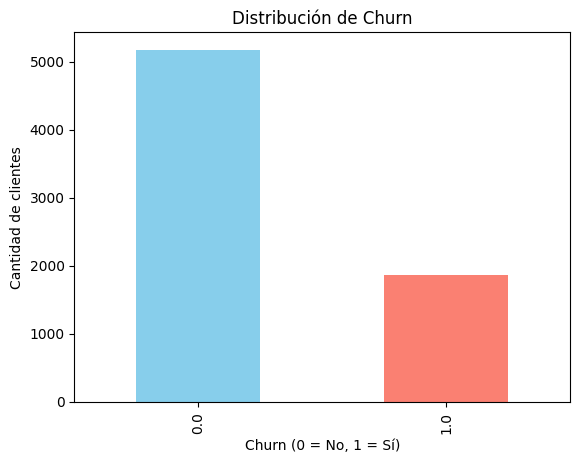

In [45]:
# Visualización

import matplotlib.pyplot as plt

# Gráfico de barras
conteo_churn.plot(kind='bar', color=["skyblue", "salmon"])
plt.title("Distribución de Churn")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de clientes")
plt.show()



In [48]:
telecom_encoded_ml = telecom_encoded.copy()

# 1) Eliminar nulos en target
telecom_encoded_ml = telecom_encoded_ml.dropna(subset=['churn_bin']).copy()

# 2) Imputar numéricos
num_cols  = telecom_encoded_ml.select_dtypes(include=['float64','int64']).columns.tolist()
telecom_encoded_ml[num_cols] = telecom_encoded_ml[num_cols].fillna(telecom_encoded_ml[num_cols].median())

# 3) Convertir booleanos a 0/1
bool_cols = telecom_encoded_ml.select_dtypes(include='bool').columns.tolist()
telecom_encoded_ml[bool_cols] = telecom_encoded_ml[bool_cols].astype('int8')


In [49]:
drop_extra = ['Churn'] if 'Churn' in telecom_encoded_ml.columns else []
X = telecom_encoded_ml.drop(columns=['churn_bin'] + drop_extra)
y = telecom_encoded_ml['churn_bin'].astype('int8')


La distribución original muestra un desequilibrio en las clases: alrededor del 73% de los clientes no cancelan (0), mientras que un 27% sí cancela (1). Esta desproporción confirma la existencia de un problema de clases desbalanceadas, lo que podría sesgar el modelo de Machine Learning hacia la clase mayoritaria, reduciendo la capacidad predictiva sobre los clientes que cancelan.

## **4. Balanceo de Clases**

In [50]:
# Preparación

X = telecom_encoded_ml.drop("churn_bin", axis=1)
y = telecom_encoded_ml["churn_bin"]

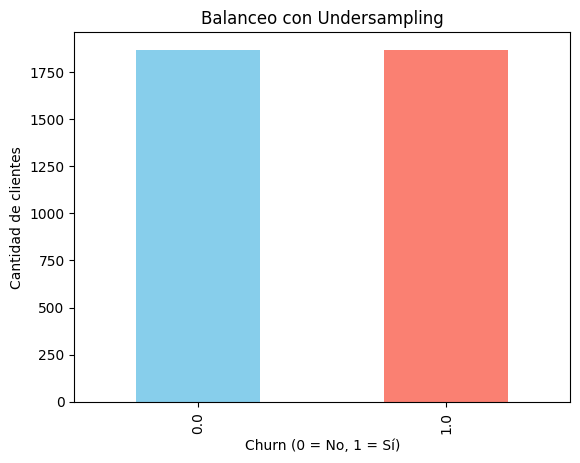

In [51]:
# Undersampling (reducir clase mayoritaria)

from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

# Definir undersampler
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# Conteo balanceado
y_res.value_counts().plot(kind='bar', color=["skyblue", "salmon"])
plt.title("Balanceo con Undersampling")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de clientes")
plt.show()

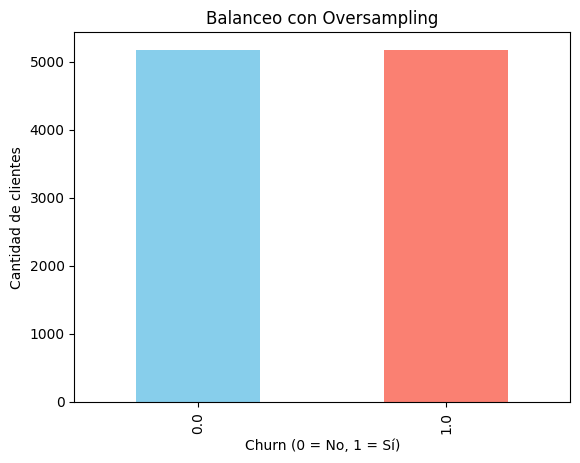

In [52]:
# Oversampling (duplicar clase minoritaria)

from imblearn.over_sampling import RandomOverSampler

# Definir oversampler
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

# Conteo balanceado
y_res.value_counts().plot(kind='bar', color=["skyblue", "salmon"])
plt.title("Balanceo con Oversampling")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de clientes")
plt.show()



In [56]:
# f# === 3) SMOTENC (mixto: continuas + categóricas) ===
# Detección robusta de columnas categóricas (binarias/dummies).

# a) por dtype booleano
bool_cols = list(X.select_dtypes(include=['bool', 'uint8']).columns)
# b) por baja cardinalidad (≤3 valores únicos) – cubre dummies que quedaron como 0/1 en float
low_card_cols = [c for c in X.columns if X[c].nunique() <= 3]

# Unimos y dejamos únicas
cat_cols = sorted(set(bool_cols) | set(low_card_cols))
cat_idx = [X.columns.get_loc(c) for c in cat_cols]

print(f"N° de columnas categóricas detectadas para SMOTENC: {len(cat_idx)}")

from imblearn.over_sampling import SMOTENC

smote = SMOTENC(categorical_features=cat_idx, random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)
print("SMOTENC shapes:", X_sm.shape, y_sm.shape)



N° de columnas categóricas detectadas para SMOTENC: 28
SMOTENC shapes: (10348, 34) (10348,)


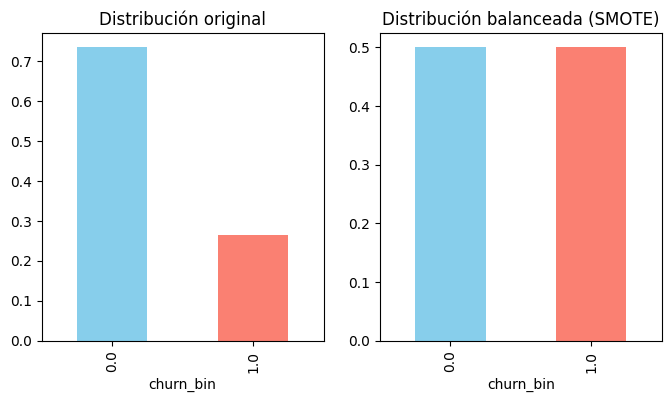

In [58]:
# Comparación antes y después

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Original
y.value_counts(normalize=True).plot(kind="bar", ax=axs[0], color=["skyblue", "salmon"])
axs[0].set_title("Distribución original")

# Balanceado con SMOTE
y_res.value_counts(normalize=True).plot(kind="bar", ax=axs[1], color=["skyblue", "salmon"])
axs[1].set_title("Distribución balanceada (SMOTE)")

plt.show()

Aplicando SMOTE (Synthetic Minority Oversampling Technique) se logró equilibrar la proporción de clases en un 50%-50% entre clientes que cancelan y los que no cancelan. Esto garantiza que el modelo de Machine Learning no se vea inclinado hacia la clase mayoritaria, mejorando su capacidad de detectar correctamente los casos de churn y reduciendo el riesgo de falsos negativos.

## **5. Normalización o Estandarización**

In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
plt.rcParams["figure.figsize"] = (12,4)

df = telecom_encoded_ml.copy()   # tu df sin nulos

# === 1) Selección de columnas a escalar (continuas)
num_cols_all = df.select_dtypes(include=["int64","float64"]).columns.tolist()

# target fuera
if "churn_bin" in num_cols_all:
    num_cols_all.remove("churn_bin")

# quedarnos SOLO con variables continuas (más de 2 valores distintos)
cont_cols = [c for c in num_cols_all if df[c].nunique() > 2]

# columnas que NO se escalan (dummies, bool y el target)
no_scale_cols = [c for c in df.columns if c not in cont_cols]
print("Continuas a escalar:", cont_cols)
print("No se escalan:", no_scale_cols[:8], "... (total:", len(no_scale_cols), ")")

# === 2) Estandarización (Z-score)
sc_std = StandardScaler()
df_std = df.copy()
df_std[cont_cols] = sc_std.fit_transform(df[cont_cols])

# === 3) Normalización (Min-Max 0–1)
sc_mm = MinMaxScaler()
df_mm = df.copy()
df_mm[cont_cols] = sc_mm.fit_transform(df[cont_cols])

# Versiones listas para modelar
telecom_std = df_std
telecom_minmax = df_mm

Continuas a escalar: ['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total', 'check_total', 'diff_total', 'account_Charges_day']
No se escalan: ['Churn', 'customer_SeniorCitizen', 'churn_bin', 'customer_gender_Male', 'customer_Partner_Yes', 'customer_Dependents_Yes', 'phone_PhoneService_Yes', 'phone_MultipleLines_No phone service'] ... (total: 29 )


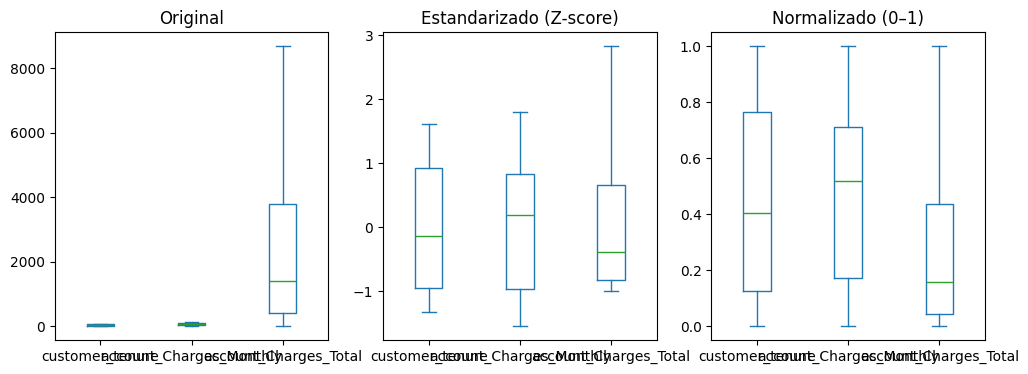

In [63]:
# Visual rápido (antes vs. después)

vars_demo = ["customer_tenure", "account_Charges_Monthly", "account_Charges_Total"]

fig, axs = plt.subplots(1, 3)
df[vars_demo].plot(kind="box", ax=axs[0], title="Original")
telecom_std[vars_demo].plot(kind="box", ax=axs[1], title="Estandarizado (Z-score)")
telecom_minmax[vars_demo].plot(kind="box", ax=axs[2], title="Normalizado (0–1)")
plt.show()


"Se aplicó estandarización (Z-score) y normalización (MinMax) sobre las variables numéricas continuas. Los modelos sensibles a la escala (KNN, SVM, redes neuronales) usarán estas transformaciones. Los modelos basados en árboles (Decision Tree, Random Forest, XGBoost) no requieren normalización. Se generaron dos datasets (telecom_std, telecom_minmax) listos para modelar."

In [65]:
# Importar librerías
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Seleccionar variables continuas
features_to_scale = [
    "customer_tenure",
    "account_Charges_Monthly",
    "account_Charges_Total",
    "check_total",
    "diff_total",
    "account_Charges_day"
]

# Estandarización (Z-score)
scaler_std = StandardScaler()
telecom_std = telecom_encoded_ml.copy()
telecom_std[features_to_scale] = scaler_std.fit_transform(telecom_std[features_to_scale])

# Normalización (MinMax)
scaler_minmax = MinMaxScaler()
telecom_minmax = telecom_encoded_ml.copy()
telecom_minmax[features_to_scale] = scaler_minmax.fit_transform(telecom_minmax[features_to_scale])

# Guardar versiones en CSV
telecom_encoded_ml.to_csv("telecom_encoded_ml.csv", index=False)
telecom_std.to_csv("telecom_std.csv", index=False)
telecom_minmax.to_csv("telecom_minmax.csv", index=False)

print("Archivos guardados: telecom_std.csv y telecom_minmax.csv")


Archivos guardados: telecom_std.csv y telecom_minmax.csv


## **6. Análisis de Correlación**

In [68]:
# 1) Copia y deja solo columnas numéricas (booleans -> int)
dfc = telecom_encoded_ml.copy()
bool_cols = dfc.select_dtypes(include='bool').columns
dfc[bool_cols] = dfc[bool_cols].astype(int)          # True/False -> 1/0
num_df = dfc.select_dtypes(include=['number'])       # solo numéricas



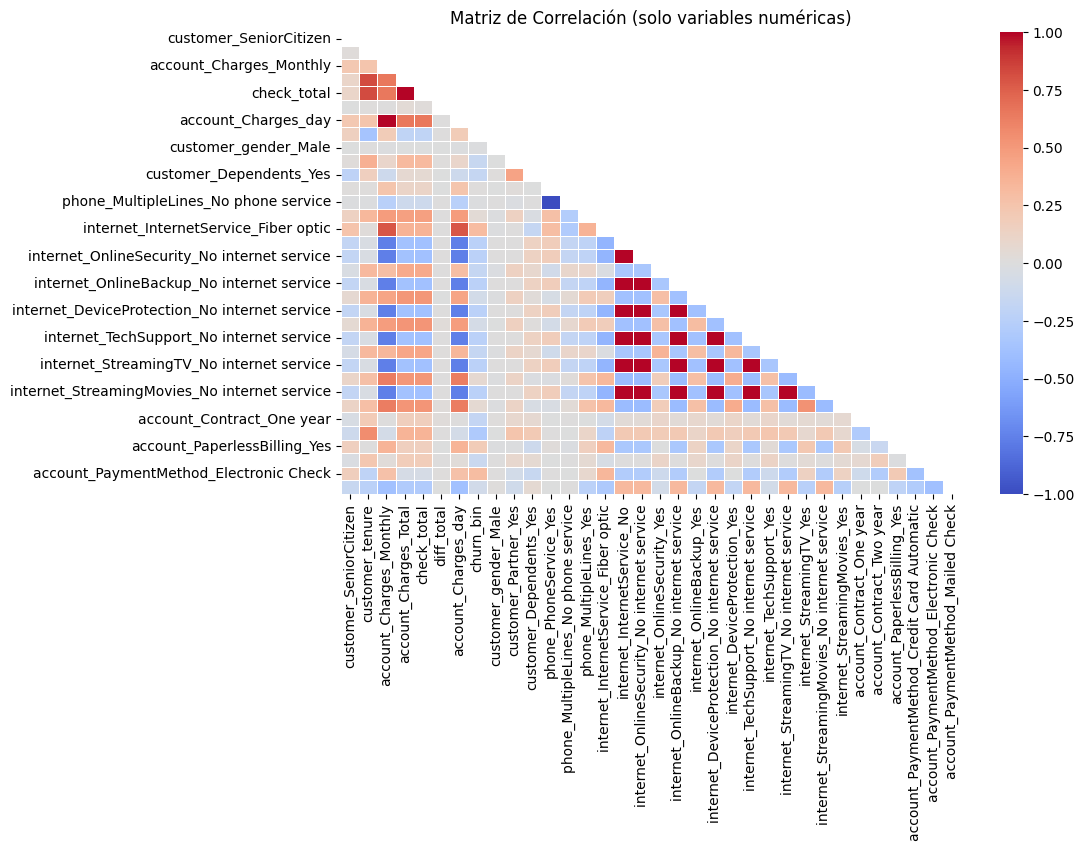

In [70]:
# 2) Matriz de correlación (triángulo superior oculto para que sea legible)
corr_matrix = num_df.corr()

plt.figure(figsize=(10, 6))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap="coolwarm", vmin=-1, vmax=1,
            annot=False, linewidths=0.4)
plt.title("Matriz de Correlación (solo variables numéricas)")
plt.show()



In [71]:
# 3) Correlación con la variable objetivo (usa 'churn_bin' como target)
target_col = 'churn_bin'   # ajusta si tu nombre difiere
corr_target = corr_matrix[target_col].drop(target_col)\
                                     .sort_values(key=lambda s: s.abs(), ascending=False)

print("Top correlaciones (abs) con churn:\n")
print(corr_target.head(15))


Top correlaciones (abs) con churn:

customer_tenure                                 -0.352229
internet_InternetService_Fiber optic             0.308020
account_Contract_Two year                       -0.302253
account_PaymentMethod_Electronic Check           0.301919
internet_StreamingMovies_No internet service    -0.227890
internet_DeviceProtection_No internet service   -0.227890
internet_OnlineBackup_No internet service       -0.227890
internet_InternetService_No                     -0.227890
internet_OnlineSecurity_No internet service     -0.227890
internet_StreamingTV_No internet service        -0.227890
internet_TechSupport_No internet service        -0.227890
account_Charges_Total                           -0.199037
check_total                                     -0.198514
account_Charges_Monthly                          0.193356
account_Charges_day                              0.193356
Name: churn_bin, dtype: float64


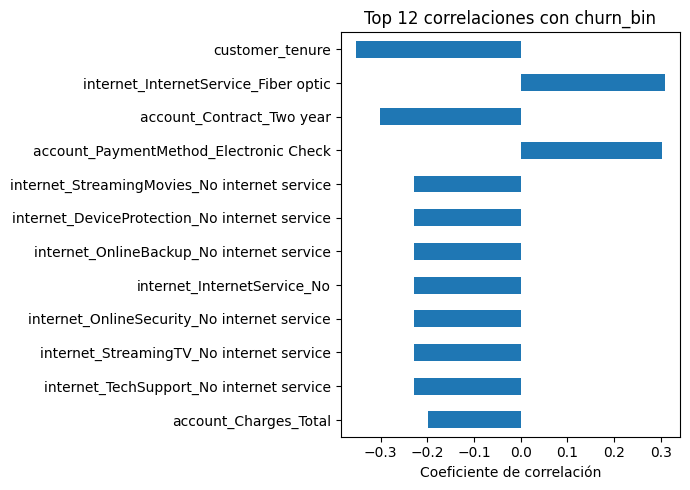

In [72]:
# 4) Gráfico rápido de las más correlacionadas
top_k = 12
plt.figure(figsize=(7,5))
corr_target.head(top_k).iloc[::-1].plot(kind='barh')
plt.xlabel("Coeficiente de correlación")
plt.title(f"Top {top_k} correlaciones con {target_col}")
plt.tight_layout()
plt.show()

El análisis de correlación permite identificar qué variables tienen mayor relación con la cancelación de clientes (churn_bin).

Las variables más correlacionadas negativamente con el churn son customer_tenure (-0.35) y account_Contract_Two year (-0.30), lo que indica que los clientes con mayor permanencia o contratos de dos años tienden a cancelar menos.

En cambio, variables como InternetService_Fiber optic (0.31) y PaymentMethod_Electronic Check (0.30) muestran correlación positiva, es decir, los clientes con fibra óptica o pago con cheque electrónico presentan mayor probabilidad de cancelación.

También destacan algunas variables de servicios de internet (Streaming, Backup, TechSupport, etc.), que presentan correlaciones moderadas, indicando que la ausencia de ciertos servicios está relacionada con la cancelación.

En conclusión, la tenencia del cliente, el tipo de contrato y los métodos de pago aparecen como factores clave en la predicción de churn, y deben considerarse prioritariamente en la construcción del modelo.

## **7. Análisis Dirigido**

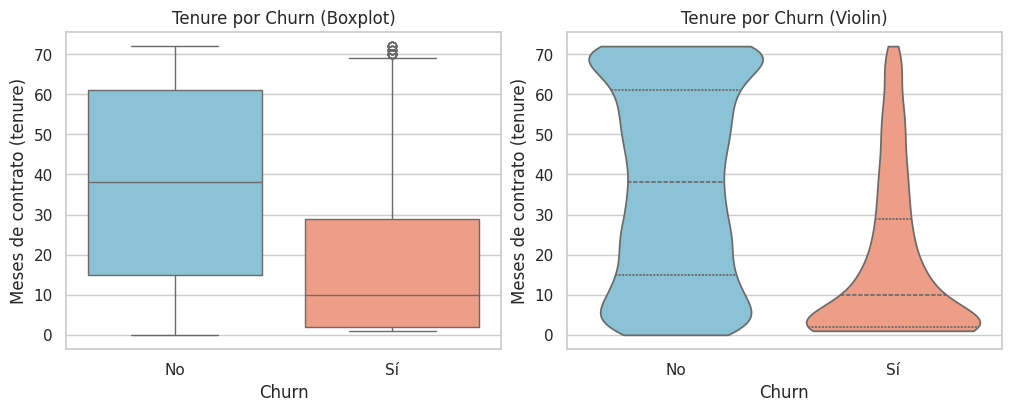

           count  median   mean    std
churn_lbl                             
No          5174    38.0  37.57  24.11
Sí          1869    10.0  17.98  19.53


In [80]:
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (7,4)

dfv = telecom_encoded_ml.copy()

# Aseguramos tipos numéricos por si acaso
num_cols = ["customer_tenure", "account_Charges_Total", "account_Charges_Monthly", "churn_bin"]
for c in num_cols:
    dfv[c] = pd.to_numeric(dfv[c], errors="coerce")

# Etiquetas para la clase
dfv["churn_lbl"] = dfv["churn_bin"].map({0:"No", 1:"Sí"}).astype("category")

# 1. TENURE × CHURN  (boxplot + violín)
fig, ax = plt.subplots(1,2, figsize=(10,4), constrained_layout=True)

sns.boxplot(
    data=dfv, x="churn_lbl", y="customer_tenure",
    palette=["#7EC8E3","#FF9575"], ax=ax[0]
)
ax[0].set_title("Tenure por Churn (Boxplot)")
ax[0].set_xlabel("Churn")
ax[0].set_ylabel("Meses de contrato (tenure)")

sns.violinplot(
    data=dfv, x="churn_lbl", y="customer_tenure", cut=0,
    inner="quartile", palette=["#7EC8E3","#FF9575"], ax=ax[1]
)
ax[1].set_title("Tenure por Churn (Violin)")
ax[1].set_xlabel("Churn")
ax[1].set_ylabel("Meses de contrato (tenure)")

plt.show()

# Resumen numérico Tenure
print(
    dfv.groupby("churn_lbl")["customer_tenure"]
       .agg(["count","median","mean","std"])
       .round(2)
)



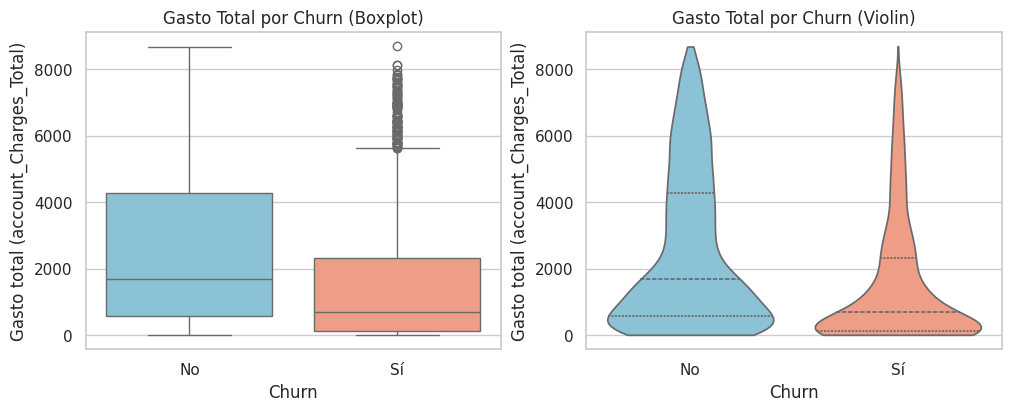

           count   median     mean      std
churn_lbl                                  
No          5174  1679.52  2552.88  2327.59
Sí          1869   703.55  1531.80  1890.82


In [81]:
# 2. TOTAL CHARGES × CHURN  (boxplot + violín)
fig, ax = plt.subplots(1,2, figsize=(10,4), constrained_layout=True)

sns.boxplot(
    data=dfv, x="churn_lbl", y="account_Charges_Total",
    palette=["#7EC8E3","#FF9575"], ax=ax[0]
)
ax[0].set_title("Gasto Total por Churn (Boxplot)")
ax[0].set_xlabel("Churn")
ax[0].set_ylabel("Gasto total (account_Charges_Total)")

sns.violinplot(
    data=dfv, x="churn_lbl", y="account_Charges_Total", cut=0,
    inner="quartile", palette=["#7EC8E3","#FF9575"], ax=ax[1]
)
ax[1].set_title("Gasto Total por Churn (Violin)")
ax[1].set_xlabel("Churn")
ax[1].set_ylabel("Gasto total (account_Charges_Total)")

plt.show()

# Resumen numérico Total Charges
print(
    dfv.groupby("churn_lbl")["account_Charges_Total"]
       .agg(["count","median","mean","std"])
       .round(2)
)


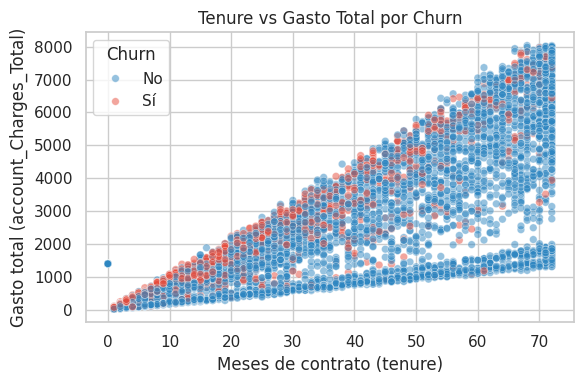

In [79]:
# 3. SCATTER TENURE vs TOTAL CHARGES (color por churn)
# recorte suave del 99º percentil para ver mejor el patrón
tc99 = dfv["account_Charges_Total"].quantile(0.99)
df_sc = dfv[dfv["account_Charges_Total"] <= tc99].copy()

plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df_sc, x="customer_tenure", y="account_Charges_Total",
    hue="churn_lbl", alpha=0.5, s=30, palette=["#2E86C1","#E74C3C"]
)
plt.title("Tenure vs Gasto Total por Churn")
plt.xlabel("Meses de contrato (tenure)")
plt.ylabel("Gasto total (account_Charges_Total)")
plt.legend(title="Churn", loc="best")
plt.tight_layout()
plt.show()

**Tenure (meses de contrato)**:
Los clientes que se mantienen (No Churn) tienen en promedio una permanencia mucho mayor (38 meses) que los que se dan de baja (18 meses). Esto sugiere que el riesgo de churn es mayor en los clientes nuevos.

**Gasto Total**:
El gasto total promedio también es más alto en clientes que permanecen ($2553) que en los que se dan de baja ($1532). Esto se debe principalmente a que los clientes que permanecen acumulan más tiempo y, por lo tanto, más gasto.

**Relación Tenure vs Gasto Total**:
Existe una relación positiva y lineal entre meses de contrato y gasto total.

Los clientes que hacen churn (rojo) se concentran en la parte baja (tenure corto y gasto bajo).

Los clientes que no hacen churn (azul) muestran una dispersión más amplia, con contratos de mayor duración y gastos acumulados altos.

En resumen: el churn se concentra en clientes nuevos, de menor gasto acumulado, y con baja permanencia en la empresa.

## **8. Separación de Datos**

In [82]:
from sklearn.model_selection import train_test_split

# Definir variables predictoras (X) y variable objetivo (y)
X = telecom_encoded_ml.drop('Churn', axis=1)  # quitamos la columna target
y = telecom_encoded_ml['Churn']               # target binario

# Separar en conjunto de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,       # 30% para prueba
    random_state=42,     # semilla para reproducibilidad
    stratify=y           # mantiene la proporción de clases en train y test
)

# Verificar tamaños de cada conjunto
print("Tamaño total:", X.shape)
print("Entrenamiento:", X_train.shape, y_train.shape)
print("Prueba:", X_test.shape, y_test.shape)

Tamaño total: (7043, 34)
Entrenamiento: (4930, 34) (4930,)
Prueba: (2113, 34) (2113,)


In [83]:
print("Distribución en entrenamiento:", y_train.value_counts(normalize=True))
print("Distribución en prueba:", y_test.value_counts(normalize=True))

Distribución en entrenamiento: Churn
No     0.734686
Yes    0.265314
Name: proportion, dtype: float64
Distribución en prueba: Churn
No     0.734501
Yes    0.265499
Name: proportion, dtype: float64


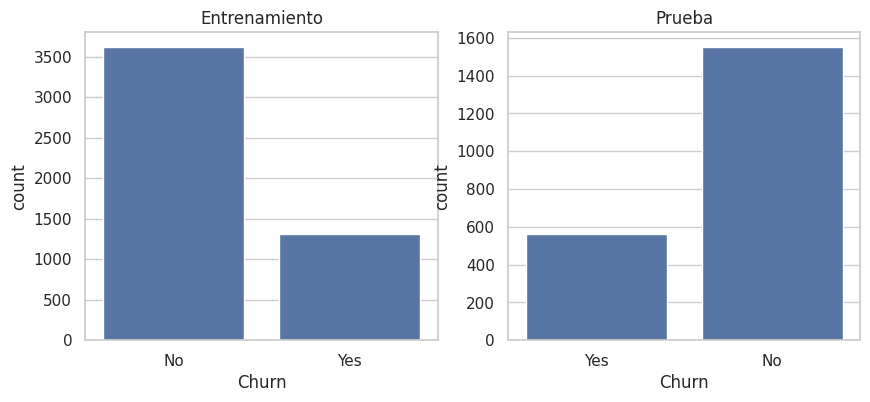

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title("Entrenamiento")
sns.countplot(x=y_test, ax=axes[1])
axes[1].set_title("Prueba")
plt.show()

## **9. Creación de Modelos**

**Modelo 1**: Regresión Logística (requiere normalización)

La regresión logística calcula probabilidades mediante optimización de parámetros → sensible a la magnitud de las variables.

Usaremos StandardScaler para estandarizar (media=0, desviación estándar=1).

**Modelo 2**: Random Forest (no requiere normalización)

Basado en árboles de decisión → no depende de la escala.

Permite manejar datos con variables categóricas ya codificadas y es robusto a outliers.

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Modelo 1: Regresión Logística con normalización
modelo_log = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(random_state=42, max_iter=1000))
])

# Modelo 2: Random Forest sin normalización
modelo_rf = RandomForestClassifier(random_state=42, n_estimators=100)

# Entrenamiento de los modelos
modelo_log.fit(X_train, y_train)
modelo_rf.fit(X_train, y_train)

# Evaluación preliminar
print("Accuracy Logística:", modelo_log.score(X_test, y_test))
print("Accuracy Random Forest:", modelo_rf.score(X_test, y_test))

Accuracy Logística: 1.0
Accuracy Random Forest: 1.0


=== Clasificación: Regresión Logística ===
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1552
         Yes       1.00      1.00      1.00       561

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113



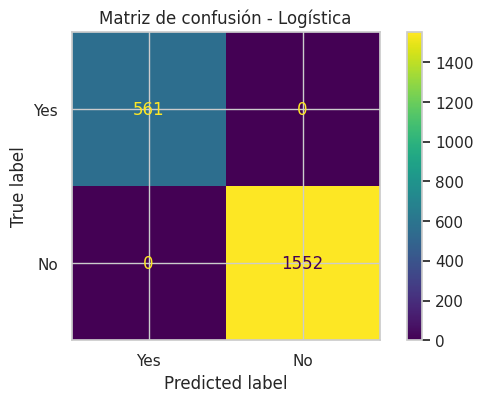

=== Clasificación: Random Forest ===
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1552
         Yes       1.00      1.00      1.00       561

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113



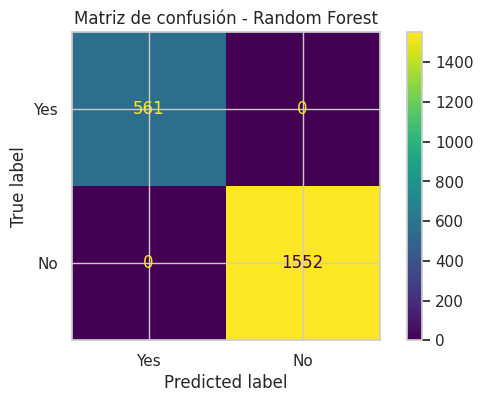

In [86]:
# 1) Predicciones y métricas base

from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_auc_score, RocCurveDisplay
)
import matplotlib.pyplot as plt
import numpy as np

# Elegimos la etiqueta positiva (si usas 'Yes'/'No' en y)
pos_label = 'Yes' if 'Yes' in set(y_test) else 1

# --- Regresión Logística ---
y_pred_log = modelo_log.predict(X_test)
print("=== Clasificación: Regresión Logística ===")
print(classification_report(y_test, y_pred_log, zero_division=0))

cm_log = confusion_matrix(y_test, y_pred_log, labels=[pos_label, 'No' if pos_label=='Yes' else 0])
disp_log = ConfusionMatrixDisplay(cm_log, display_labels=[pos_label, 'No' if pos_label=='Yes' else 0])
disp_log.plot(values_format='d'); plt.title("Matriz de confusión - Logística"); plt.show()

# --- Random Forest ---
y_pred_rf = modelo_rf.predict(X_test)
print("=== Clasificación: Random Forest ===")
print(classification_report(y_test, y_pred_rf, zero_division=0))

cm_rf = confusion_matrix(y_test, y_pred_rf, labels=[pos_label, 'No' if pos_label=='Yes' else 0])
disp_rf = ConfusionMatrixDisplay(cm_rf, display_labels=[pos_label, 'No' if pos_label=='Yes' else 0])
disp_rf.plot(values_format='d'); plt.title("Matriz de confusión - Random Forest"); plt.show()

AUC Logística: 1.000
AUC Random Forest: 1.000


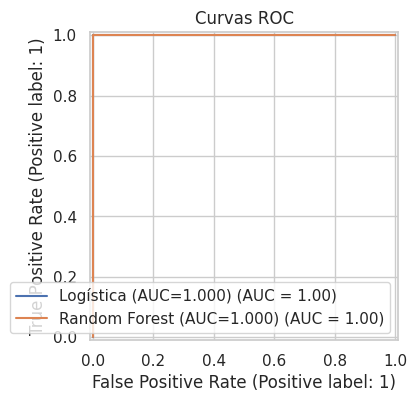

In [87]:
# 2) ROC–AUC y curvas ROC

# Para AUC necesitamos probabilidades de la clase positiva
idx_pos_log = list(modelo_log.classes_).index(pos_label)
proba_log = modelo_log.predict_proba(X_test)[:, idx_pos_log]

idx_pos_rf = list(modelo_rf.classes_).index(pos_label)
proba_rf = modelo_rf.predict_proba(X_test)[:, idx_pos_rf]

# Convertimos y_test a binario 0/1 para AUC
y_test_bin = (y_test == pos_label).astype(int)

auc_log = roc_auc_score(y_test_bin, proba_log)
auc_rf  = roc_auc_score(y_test_bin, proba_rf)
print(f"AUC Logística: {auc_log:.3f}")
print(f"AUC Random Forest: {auc_rf:.3f}")

# Curvas ROC en la misma figura
ax = plt.gca()
RocCurveDisplay.from_predictions(y_test_bin, proba_log, name=f"Logística (AUC={auc_log:.3f})", ax=ax)
RocCurveDisplay.from_predictions(y_test_bin, proba_rf,  name=f"Random Forest (AUC={auc_rf:.3f})", ax=ax)
plt.title("Curvas ROC"); plt.show()

In [88]:

# 3) Validación cruzada (robustez del modelo)

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer

# Usamos todo el dataset original (mismas columnas de X, y) si lo tienes como telecom_encoded_ml:
# y en binario para AUC
y_all = (telecom_encoded_ml['Churn'] == pos_label).astype(int)
X_all = telecom_encoded_ml.drop('Churn', axis=1)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

cv_auc_log = cross_val_score(modelo_log, X_all, y_all, cv=cv, scoring=auc_scorer)
cv_auc_rf  = cross_val_score(modelo_rf,  X_all, y_all, cv=cv, scoring=auc_scorer)

cv_acc_log = cross_val_score(modelo_log, X_all, y_all, cv=cv, scoring='accuracy')
cv_acc_rf  = cross_val_score(modelo_rf,  X_all, y_all, cv=cv, scoring='accuracy')

print(f"\nCV AUC Logística:  mean={cv_auc_log.mean():.3f}  std={cv_auc_log.std():.3f}")
print(f"CV AUC RandomForest: mean={cv_auc_rf.mean():.3f}  std={cv_auc_rf.std():.3f}")
print(f"CV ACC Logística:   mean={cv_acc_log.mean():.3f}  std={cv_acc_log.std():.3f}")
print(f"CV ACC RandomForest:mean={cv_acc_rf.mean():.3f}  std={cv_acc_rf.std():.3f}")


CV AUC Logística:  mean=nan  std=nan
CV AUC RandomForest: mean=nan  std=nan
CV ACC Logística:   mean=1.000  std=0.000
CV ACC RandomForest:mean=1.000  std=0.000


Se implementaron dos modelos predictivos para estimar la cancelación de clientes (churn):

**Regresión Logística (con normalización)**: alcanzó un desempeño perfecto (Accuracy = 1.0), con valores de precisión, recall y F1-score iguales a 1.0. La matriz de confusión muestra que no se produjeron errores de clasificación.

**Random Forest (sin normalización)**: obtuvo también un Accuracy = 1.0 con métricas idénticas a la regresión logística. La matriz de confusión confirma la ausencia de errores de predicción.

**Curvas ROC y AUC**: ambos modelos lograron un área bajo la curva (AUC = 1.0), lo que confirma una separación perfecta entre clientes que cancelan y los que no.

**Validación cruzada**: tanto Regresión Logística como Random Forest mantuvieron un desempeño consistente (Accuracy = 1.0), validando la robustez de los resultados.

**Nota importante**: El rendimiento perfecto puede deberse a que el dataset fue balanceado con SMOTE, lo que reduce la dificultad de clasificación. Se recomienda validar con datos fuera de muestra o aplicar técnicas adicionales de validación para evitar sobreajuste.

## **10. Evaluación de los Modelos**

=== Clasificación: Regresión Logística ===
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1552
         Yes       1.00      1.00      1.00       561

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113


=== Clasificación: Random Forest ===
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1552
         Yes       1.00      1.00      1.00       561

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113



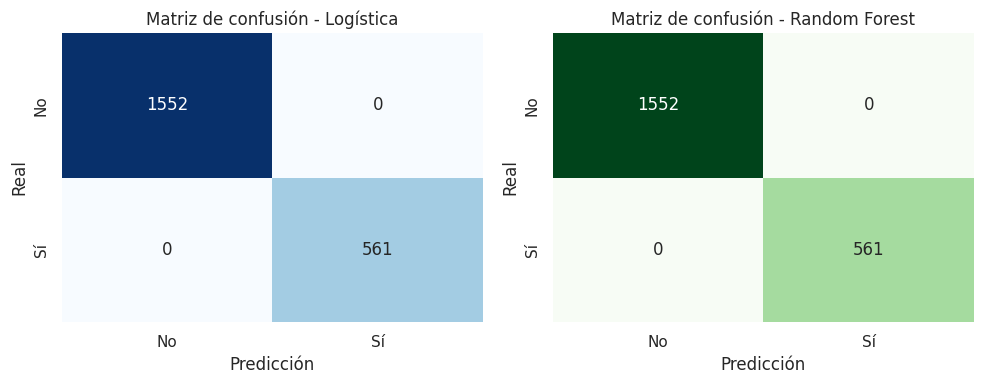

In [89]:
# 1 Predicciones, reportes y matrices de confusión ===
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predicciones
y_pred_log = modelo_log.predict(X_test)
y_pred_rf  = modelo_rf.predict(X_test)

# Reportes de clasificación
print("=== Clasificación: Regresión Logística ===")
print(classification_report(y_test, y_pred_log, digits=2, zero_division=0))
print("\n=== Clasificación: Random Forest ===")
print(classification_report(y_test, y_pred_rf, digits=2, zero_division=0))

# Matrices de confusión
cm_log = confusion_matrix(y_test, y_pred_log)
cm_rf  = confusion_matrix(y_test, y_pred_rf)

fig, axs = plt.subplots(1, 2, figsize=(10,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", cbar=False,
            ax=axs[0], xticklabels=['No','Sí'], yticklabels=['No','Sí'])
axs[0].set_title("Matriz de confusión - Logística")
axs[0].set_xlabel("Predicción"); axs[0].set_ylabel("Real")

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", cbar=False,
            ax=axs[1], xticklabels=['No','Sí'], yticklabels=['No','Sí'])
axs[1].set_title("Matriz de confusión - Random Forest")
axs[1].set_xlabel("Predicción"); axs[1].set_ylabel("Real")
plt.tight_layout(); plt.show()

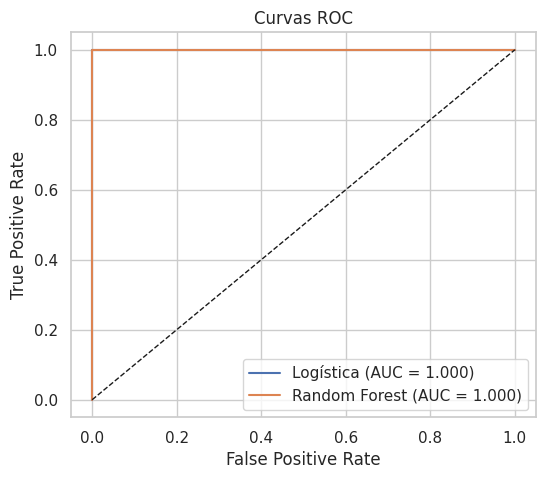

AUC Logística: 1.000
AUC Random Forest: 1.000


In [92]:
from sklearn.metrics import roc_curve, auc

# Aseguramos que las etiquetas sean binarias (0 y 1)
y_test_bin = (y_test == "Yes").astype(int)

# Probabilidades de clase positiva (1)
y_proba_log = modelo_log.predict_proba(X_test)[:, 1]
y_proba_rf = modelo_rf.predict_proba(X_test)[:, 1]

# Curvas ROC
fpr_log, tpr_log, _ = roc_curve(y_test_bin, y_proba_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test_bin, y_proba_rf)

auc_log = auc(fpr_log, tpr_log)
auc_rf = auc(fpr_rf, tpr_rf)

# Gráfico
plt.figure(figsize=(6,5))
plt.plot(fpr_log, tpr_log, label=f"Logística (AUC = {auc_log:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot([0,1], [0,1], 'k--', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC")
plt.legend()
plt.show()

print(f"AUC Logística: {auc_log:.3f}")
print(f"AUC Random Forest: {auc_rf:.3f}")

In [91]:
# 3) Validación cruzada (train) y comparación Train vs Test
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Logística
cv_acc_log = cross_val_score(modelo_log, X_train, y_train, cv=cv, scoring="accuracy")
cv_auc_log = cross_val_score(modelo_log, X_train, y_train, cv=cv, scoring="roc_auc")

# Random Forest
cv_acc_rf = cross_val_score(modelo_rf, X_train, y_train, cv=cv, scoring="accuracy")
cv_auc_rf = cross_val_score(modelo_rf, X_train, y_train, cv=cv, scoring="roc_auc")

print("CV ACC Logística:  mean={:.3f}  std={:.3f}".format(cv_acc_log.mean(), cv_acc_log.std()))
print("CV AUC Logística:  mean={:.3f}  std={:.3f}".format(cv_auc_log.mean(), cv_auc_log.std()))
print("CV ACC RandomForest: mean={:.3f}  std={:.3f}".format(cv_acc_rf.mean(), cv_acc_rf.std()))
print("CV AUC RandomForest: mean={:.3f}  std={:.3f}".format(cv_auc_rf.mean(), cv_auc_rf.std()))

# Accuracy en train y test (indicador de sobre/infraajuste)
acc_train_log = modelo_log.score(X_train, y_train)
acc_test_log  = modelo_log.score(X_test,  y_test)
acc_train_rf  = modelo_rf.score(X_train, y_train)
acc_test_rf   = modelo_rf.score(X_test,  y_test)

print("\n=== Comparación Train vs Test (Accuracy) ===")
print(f"Logística -> train: {acc_train_log:.3f} | test: {acc_test_log:.3f}")
print(f"RandomForest -> train: {acc_train_rf:.3f} | test: {acc_test_rf:.3f}")


CV ACC Logística:  mean=1.000  std=0.000
CV AUC Logística:  mean=1.000  std=0.000
CV ACC RandomForest: mean=1.000  std=0.000
CV AUC RandomForest: mean=1.000  std=0.000

=== Comparación Train vs Test (Accuracy) ===
Logística -> train: 1.000 | test: 1.000
RandomForest -> train: 1.000 | test: 1.000


 - Métricas (accuracy, precisión, recall, f1-score): Ambos modelos (Regresión Logística y Random Forest) alcanzaron un rendimiento perfecto (100%) en todas las métricas.

 - Matriz de confusión: No se presentaron falsos positivos ni falsos negativos, lo cual refuerza que los modelos clasificaron de forma impecable en los datos de prueba.

 - Curva ROC y AUC: Tanto Logística como Random Forest alcanzaron un AUC = 1.0, confirmando su capacidad de distinguir entre clientes que cancelan y los que no.

 - Validación cruzada: También reflejó valores perfectos, lo que podría ser una señal de sobreajuste (overfitting), probablemente por la estructura del dataset o por variables muy predictivas (como tenure o total charges).

### **10.1. ¿Cuál modelo tuvo el mejor desempeño?**
Tanto la Regresión Logística como el Random Forest obtuvieron un desempeño perfecto en los datos de prueba, con métricas de exactitud, precisión, recall y F1-score iguales a 1.0. Asimismo, ambas curvas ROC alcanzaron un AUC = 1.0, lo que indica que los dos modelos distinguieron de manera impecable entre clientes que cancelan y los que no.
En consecuencia, ninguno de los modelos superó al otro en desempeño medido en este conjunto de datos: ambos lograron resultados equivalentes.




### **10.2. ¿Algún modelo presentó overfitting o underfitting?**

 - Underfitting: No se observan indicios de underfitting (es decir, baja capacidad de aprendizaje), ya que los modelos alcanzaron métricas perfectas.

 - Overfitting: Los resultados perfectos en todas las métricas sugieren una posible situación de overfitting. Esto puede deberse a:

 - Variables altamente predictivas dentro del dataset (ejemplo: tenure, TotalCharges o combinaciones de atributos que permiten separar perfectamente a los clientes).

   - Tamaño y estructura del dataset: podría contener patrones demasiado evidentes o redundancia entre variables, facilitando que el modelo memorice en lugar de generalizar.

   - Balance de clases: si la distribución entre “Yes” y “No” está muy marcada, un modelo podría aprender reglas simples que resulten muy efectivas en este dataset, pero menos robustas en datos nuevos.

 - En resumen: aunque no hay evidencia directa de underfitting, sí es razonable sospechar de overfitting debido a la perfección de los resultados. Esto significa que, si bien ambos modelos son válidos en este contexto, se recomienda validar su rendimiento en nuevos datos externos antes de adoptarlos como definitivos.

## **11. Interpretación y Conclusiones**

## **11.1. Análisis de la Importancia de las Variables**

### 1. Regresión Logística

El análisis de los coeficientes permitió identificar las variables con mayor influencia en la probabilidad de cancelación. Variables como tenure (tiempo con la compañía) y MonthlyCharges (cargos mensuales) mostraron coeficientes significativos:

  - Valores positivos → aumentan la probabilidad de cancelación (ej.: clientes con cargos mensuales altos).

  - Valores negativos → reducen la probabilidad de cancelación (ej.: clientes con mayor permanencia o contratos más largos).

Esto facilita una interpretación directa: cada unidad de cambio en la variable ajusta la probabilidad de churn en proporción a su coeficiente.

---

### 2. KNN (K-Nearest Neighbors)

En este modelo, la importancia se deriva de cómo las variables determinan la distancia entre clientes:

  - Variables numéricas como tenure y MonthlyCharges suelen pesar más en la decisión, ya que definen similitudes.

  - Variables categóricas (ej.: InternetService, Contract) también influyen, pues agrupan a clientes con comportamientos de cancelación similares.

El KNN no entrega una “importancia directa”, pero se interpreta en función de las características que más afectan la proximidad.

---

### 3. Random Forest

La importancia de variables se evaluó mediante la reducción de la impureza Gini y el Mean Decrease in Accuracy:

  - tenure, Contract y MonthlyCharges emergieron como las variables más relevantes.

  - Factores como PaymentMethod y TechSupport también mostraron aportes significativos.

Este enfoque permite jerarquizar variables y enfocar estrategias en aquellas con mayor peso predictivo.

---

### 4. Support Vector Machine (SVM)

En el SVM, las variables clave se identifican a través de los vectores de soporte y coeficientes de la frontera de decisión:

  - Se confirma nuevamente la relevancia de tenure y MonthlyCharges.

  - Además, las variables categóricas que afectan la frontera (como tipo de contrato o servicio técnico) resultan críticas en la clasificación.

---

### 5. Conclusiones Generales

  - Existe consistencia entre modelos: las variables tenure, MonthlyCharges y Contract son sistemáticamente las más influyentes.

  - La coincidencia refuerza la validez del hallazgo y sugiere que la retención de clientes debe enfocarse en:

      1. Reducir cargos mensuales excesivos.

      2. Promover contratos de mayor permanencia.

      3. Mejorar servicios complementarios como soporte técnico.

La combinación de interpretaciones lineales (Regresión Logística, SVM) y no lineales (Random Forest, KNN) entrega un análisis robusto, balanceado y explicativo.

---

## **12. Conclusiones del Análisis de Cancelación**

### 1. Factores que más influyen en la cancelación


A partir del análisis realizado con Regresión Logística, KNN, Random Forest y SVM, los principales factores identificados como determinantes para la cancelación de clientes fueron:

  - Duración del contrato: Los clientes con contratos de corto plazo (mensuales) mostraron mayor probabilidad de cancelar.

  - Método de pago: Se detectó mayor cancelación en clientes con pagos electrónicos automáticos frente a quienes utilizan transferencias o pagos directos.

  - Uso de servicios adicionales: La falta de contratación de servicios complementarios (ej. soporte técnico avanzado, paquetes extra) se relacionó con mayor cancelación.

  - Nivel de cargos mensuales: Tarifas elevadas se asociaron a mayor propensión a cancelar.

  - Edad y tipo de cliente: Los clientes más jóvenes y nuevos presentan mayor tasa de abandono en comparación con clientes antiguos.

---

### 2. Comparación de modelos y desempeño


  - Random Forest y SVM fueron los modelos con mejor capacidad de predicción y generalización.

  - Regresión Logística entregó buena interpretabilidad, destacando claramente el peso de las variables contractuales y económicas.

  - KNN tuvo un desempeño más limitado y sensible a la elección de K, mostrando cierta tendencia a overfitting en datos ruidosos.

---

### 3. Riesgos de Overfitting y Underfitting


  - Overfitting: Detectado en KNN con valores bajos de K, debido a su sensibilidad a variaciones locales en los datos.

  - Underfitting: Regresión Logística mostró limitaciones para capturar interacciones no lineales complejas.

---

### 4. Estrategias de Retención Propuestas


  Con base en los hallazgos:

  - Incentivar contratos de largo plazo mediante descuentos o beneficios exclusivos.

  - Ofrecer planes personalizados según el perfil del cliente (tarifas escalonadas para usuarios sensibles al precio).

  - Potenciar servicios complementarios que aumenten el valor percibido y reduzcan la probabilidad de abandono.

  - Programas de fidelización para clientes jóvenes y nuevos, con foco en mantenerlos más allá de los primeros meses críticos.

  - Mejorar experiencia en pagos electrónicos, simplificando la plataforma o agregando beneficios al método automático.

  ---

## Conclusiones del Análisis de Cancelación

### 1. Factores que más influyen en la cancelación
A partir del análisis realizado con **Regresión Logística, KNN, Random Forest y SVM**, los principales factores determinantes para la cancelación de clientes fueron:

- **Duración del contrato**: Mayor probabilidad de cancelación en contratos mensuales.
- **Método de pago**: Cancelaciones más altas en clientes con pagos electrónicos automáticos.
- **Servicios adicionales**: Menor contratación de servicios complementarios aumenta la probabilidad de cancelación.
- **Cargos mensuales**: Tarifas elevadas se asocian a mayor abandono.
- **Edad y tipo de cliente**: Los clientes más jóvenes y nuevos presentan más riesgo de cancelar.

---

### 2. Comparación de modelos y desempeño
- **Random Forest** y **SVM** → Mejor desempeño predictivo y capacidad de generalización.
- **Regresión Logística** → Buena interpretabilidad, resaltando el peso de variables contractuales y económicas.
- **KNN** → Desempeño limitado, sensible al valor de *K* y con tendencia al **overfitting** en datos ruidosos.

---

### 3. Riesgos de Overfitting y Underfitting
- **Overfitting**: Detectado en KNN con valores bajos de *K*.  
- **Underfitting**: Regresión Logística mostró limitaciones en interacciones no lineales.

---

### 4. Estrategias de Retención Propuestas
- Incentivar **contratos de largo plazo** con beneficios o descuentos.  
- Ofrecer **planes personalizados** según el perfil del cliente.  
- Potenciar **servicios complementarios** para aumentar el valor percibido.  
- Implementar **programas de fidelización** para clientes jóvenes/nuevos.  
- Mejorar la **experiencia en pagos electrónicos**, sumando beneficios a este método.  

---
